Привет, уважаемый ревьюер. У меня вопрос: Правильно ли я назвал файл или нужно как-то по другому?

Алексей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

In [122]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

# Сравнение тарифов оператора сотовой связи

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Шаги исследования:**

1. Открыть файл с данными и изучить общую информацию

2. Подготовить данные
    - Привести данные к нужным типам
    - Найти и исправить ошибки в данных, если они есть
3. Посчитать для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя
4. Проанализировать данные:
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
    - Посчитать среднее количество, дисперсию и стандартное отклонение 
    - Построить гистограммы
    - Описать распределения
5. Проверить гипотезы
    - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    - Объяснить как формулировалась нулевая и альтернативная гипотезы
    - Объяснить какой критерий использовался для проверки гипотез и почему
6. Общий вывод

## Изучение данных из файла

In [123]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
display(calls.head())
print(calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


0


Интересно посмотреть на первый датасет и определить какая продолжительность звонков может быть, сколько звонков совершают абоненты сотового оператора.

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

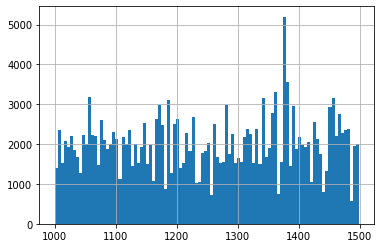

In [124]:
calls['user_id'].hist(bins=100)
calls['duration'].describe()

In [125]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [126]:
# Проверка на дубликаты и правильность заполнения стобцов. Дубликатов нет, столцы заполнены верно.
print(internet.duplicated().sum())
internet.describe() 

0


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Здесь виден лишний столбец, дублирующий индексацию.

In [127]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
display(messages.head())
#print(messages.duplicated().sum()) #проверка на дубликаты - их нет.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [128]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
display(tariffs.head()) #проверил, тарифы верны описанию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [129]:
users = pd.read_csv('/datasets/users.csv')
users.info()
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [190]:
churn_tariff = users.dropna()['tariff'].value_counts()
print(churn_tariff)

smart    23
ultra    15
Name: tariff, dtype: int64


Пользователи тарифа smart отказываются в 1,5 раза чаще от своего тарифа, чем пользователи тарифа ultra.
*Забегая вперёд: важно учитывать, что пользователей тарифа smart в два раза больше. 

In [130]:
users['age'].describe() #ошибок в возрасте нет

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [131]:
#Проверка правильности написания тарифа и города
#users['city'].unique()
#users['tariff'].unique()

### Вывод

Во всех таблицах отстутствуют пропуски, кроме users - столбец churn_date, что означает дату прекращения пользования тарифом. Эти пропуски стоит оставить без изменения (нет подходящей замены).

Дубликатов в таблицах нет. Единственные изменения которые необходимо внести: заменить тип данных в столбцах с датой на datatime для удобства работы с датой и убрать лишний столбец с дополнительной индексацией в таблице internet.
user_id - это категориальный объект и можно изменить тип этого столбца во всех таблицах на object, но я пока оставлю как есть для удобства работы.

## Предобработка данных

In [132]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [133]:
#users.info() # проверка, произошла ли замена типа данных

In [134]:
internet = internet.drop(['Unnamed: 0'], axis=1) #удаление лишнего столбца

In [135]:
#internet.info() #проверка удаления столбца

Пропуски в данных есть только в таблице users, в столбце churn_date (дата прекращения пользования тарифом). Их оставляем без изменения, так как подходящих замен нет. Во всех таблицах поменял формат даты на datatime для удобства работы. Дубликатов в таблицах нет. Был лишний столбец в таблице internet, который дублировал индексацию, его удалил.

Использованные минуты необходимо округлить до верхнего значения по каждому отдельному звонку, чтобы их учесть при расчёте оплаты. Мегабайты стоит перевести в гигабайты и тоже округлить до верхнего значения, но уже когда будет получен расчёт за месяц.

In [136]:
calls['duration'] = calls['duration'].apply(np.ceil)
internet['gb_used'] = internet['mb_used']/1024
#display(internet.head(15))

## Расчёты и добавление результатов в таблицу

In [137]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [138]:
#display(calls.head()) #проверка, получили ли мы тот месяц

In [139]:
#сводные таблицы, где мы суммируем по месяцам длительность, звонков, кол-во смс и интернет трафик.
calls_pt = calls.pivot_table(index = ['user_id', 'month'], values='duration', aggfunc=['sum' , 'count'])
internet_pt = internet.pivot_table(index = ['user_id', 'month'], values='gb_used', aggfunc='sum')
messages_pt = messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc='count')
messages_pt.columns = ['sms']#заменим название столбца с id на sms

In [140]:
display(calls_pt.head(15)) #проверка сводной таблицы
#display(messages_pt.head(15))
calls_pt.columns = ['calls_duration', 'calls_count'] #уберём двухэтажные названия

sum    count
              duration duration
user_id month                  
1000    5        159.0       22
        6        172.0       43
        7        340.0       47
        8        408.0       52
        9        466.0       58
        10       350.0       57
        11       338.0       43
        12       333.0       46
1001    11       430.0       59
        12       414.0       63
1002    6        117.0       15
        7        214.0       26
        8        289.0       42
        9        206.0       36
        10       212.0       33

In [141]:
overall_trafic_used = calls_pt.merge(internet_pt, on=['user_id', 'month'], how='outer') #объединяем все сводные таблицы. Нам важно учесть использование всех функций, поэтому способ объединения'outer'.
overall_trafic_used = overall_trafic_used.merge(messages_pt, on=['user_id', 'month'], how='outer')

In [142]:
overall_trafic_used = overall_trafic_used.fillna(0) #заменим все пропуски в таблице на ноль
overall_trafic_used = pd.DataFrame(overall_trafic_used.to_records()) #преводим двухуровневые индексы в столбцы (user_id и month). Этот шаг необходим для сохранения столбца месяцев при объединении с тарифом.
overall_trafic_used = overall_trafic_used.merge(users[['user_id','tariff']], on='user_id')
overall_trafic_used['gb_used'] = overall_trafic_used['gb_used'].apply(np.ceil)

In [143]:
display(overall_trafic_used.head(15)) #смотрим получившуюся сводную таблицу

,user_id,month,calls_duration,calls_count,gb_used,sms,tariff
0,1000,5,159.0,22.0,3.0,22.0,ultra
1,1000,6,172.0,43.0,23.0,60.0,ultra
2,1000,7,340.0,47.0,14.0,75.0,ultra
3,1000,8,408.0,52.0,14.0,81.0,ultra
4,1000,9,466.0,58.0,15.0,57.0,ultra
5,1000,10,350.0,57.0,15.0,73.0,ultra
6,1000,11,338.0,43.0,15.0,58.0,ultra
7,1000,12,333.0,46.0,10.0,70.0,ultra
8,1001,11,430.0,59.0,18.0,0.0,smart
9,1001,12,414.0,63.0,14.0,0.0,smart


In [144]:
def tariff_payment(tariff, calls, internet, sms):
    payment = 0
    calls_payment = 0
    internet_payment = 0
    sms_payment = 0
    if tariff == 'ultra':
        if (calls - 3000) > 0:
            calls_payment = calls - 3000
        else:
            calls_payment = 0
        if (internet - 30) > 0:
            internet_payment = (internet - 30) * 150
        else:
            internet_payment = 0
        if (sms - 1000) > 0:
            sms_payment = (sms - 1000) * 1
        payment = calls_payment + internet_payment + sms_payment + 1950
        return payment
    elif tariff == 'smart':
        if (calls - 500) > 0:
            calls_payment = (calls - 500) * 3
        else:
            calls_payment = 0
        if (internet - 15) > 0:
            internet_payment = (internet - 15) * 200
        else:
            internet_payment = 0
        if (sms - 50) > 0:
            sms_payment = (sms - 50) * 3
        payment = calls_payment + internet_payment + sms_payment + 550
        return payment

In [145]:
overall_trafic_used['payment'] = overall_trafic_used.apply(lambda x: tariff_payment(x['tariff'], x['calls_duration'], x['gb_used'], x['sms']), axis=1)

In [146]:
#display(overall_trafic_ultra.head(15)) #проверка как работает функция. Всё верно.

Сначала был получен месяц из даты в каждой таблице, а затем построены сводные таблицы по количеству смс, интернет трафика, длительности и количеству звонков по месяцам для каждого пользователя. Убрал двухэтажные названия таблиц и объединил их в одну на основе месяца и id пользователя. Добавил добавил тариф для каждого месяца пользователя. На основе функции tariff_payment платёж для каждого месяца пользователей в зависимости от тарифа. Получившийся результат поместил в столбец payment таблицы overall_trafic_used.

## Исследовательский анализ данных

In [173]:
overall_trafic_ultra = overall_trafic_used.loc[overall_trafic_used['tariff'] == 'ultra'] #отдельные таблицы для удобства построения гистограм 
overall_trafic_smart = overall_trafic_used.loc[overall_trafic_used['tariff'] == 'smart']
users_smart = len(users.loc[users['tariff'] == 'smart', 'user_id'])
users_ultra = len(users.loc[users['tariff'] == 'ultra', 'user_id'])
print('Кол-во строк использования тарифа Ultra по месяцам:', len(overall_trafic_ultra))
print('Кол-во строк использования тарифа Smart по месяцам:', len(overall_trafic_smart))
print('Кол-во пользователей тарифа Smart:', users_smart)
print('Кол-во пользователей тарифа Smart:', users_ultra)

Кол-во строк использования тарифа Ultra по месяцам: 985
Кол-во строк использования тарифа Smart по месяцам: 2229
Кол-во пользователей тарифа Smart: 351
Кол-во пользователей тарифа Smart: 149


In [148]:
overall_trafic_used_pt = overall_trafic_used.pivot_table(index='tariff', values=['calls_duration', 'gb_used', 'sms','payment'], aggfunc=['mean', 'median'])
display(overall_trafic_used_pt)

mean                                            median  \
       calls_duration    gb_used      payment        sms calls_duration   
tariff                                                                    
smart      417.934948  16.328847  1289.973531  33.384029          422.0   
ultra      526.623350  19.494416  2070.152284  49.363452          518.0   

                              
       gb_used payment   sms  
tariff                        
smart     17.0  1023.0  28.0  
ultra     19.0  1950.0  38.0

<AxesSubplot:xlabel='Call duration', ylabel='min'>

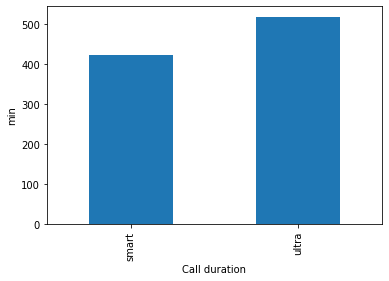

In [149]:
overall_trafic_used_pt.plot(y=('median', 'calls_duration'), kind='bar', legend=False, xlabel='Call duration', ylabel='min')

<AxesSubplot:xlabel='Gb used', ylabel='gigabyte'>

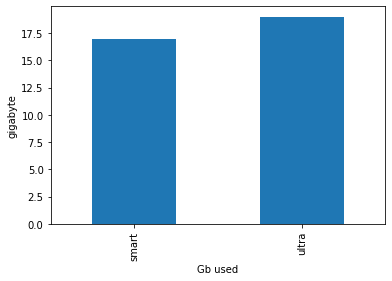

In [150]:
overall_trafic_used_pt.plot(y=('median','gb_used'), kind='bar', legend=False, xlabel='Gb used', ylabel='gigabyte')

<AxesSubplot:xlabel='Sms'>

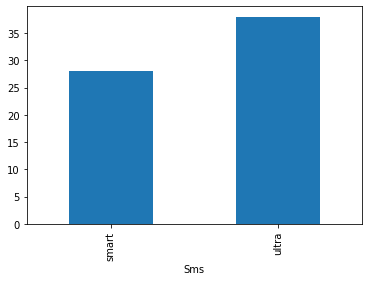

In [151]:
overall_trafic_used_pt.plot(y=('median','sms'), kind='bar', legend=False, xlabel='Sms')

Пользователи тарифа smart тратят в среднем в месяц около 400 минут на разговоры, 17 гб интернет траффика (приходится покупать гигабайты дополнительно) и около 30 смс. Дополнительный заработок идёт за счёт интернета и приносит около 400 руб. в месяц на клиента. В остальном пользователи укладываются в абонентскую плату.

В среднем пользовати тарифа ультра тратят на 100 минут больше, чем пользователи тарифа smart. Они отравляют на 10-15 смс больше и тратят на 2-3 гб больше интренет трафика. С точки зрения пользователя - был бы идеален промежуточный тариф между смартом и ультра, который бы учитывал эти параметры.

In [152]:
display(overall_trafic_used.pivot_table(index='tariff', values=['calls_duration', 'gb_used', 'sms','payment'], aggfunc=['std', 'var']).stack())

std            var
tariff                                          
smart  calls_duration  190.313730   36219.315784
       gb_used           5.747061      33.028705
       payment         818.404367  669785.708006
       sms              28.227876     796.812958
ultra  calls_duration  317.606098  100873.633397
       gb_used           9.853511      97.091686
       payment         376.187114  141516.745079
       sms              47.804457    2285.266143

Стоит проверить, а действительно ли в таблице получилась дисперсия, расчитанная для выборки, а не для генеральной совокупности. Ниже проверим это отдельно для длительности звонков пользователей тарифа smart (первая строка таблицы).

In [153]:
#Проверка, а действительно ли в таблице посчитаны значения для выборок, а не для генеральной совокупности.
print('Дисперсия и стандартное отклонение для длительности звонков пользователей тарифа smart:')
print('Дисперсия для выборки:', np.var(overall_trafic_smart['calls_duration'], ddof=1))
print('Дисперсия для генеральной совокупности:', np.var(overall_trafic_smart['calls_duration']))
print('Стандартное отклонение для выборки:', np.std(overall_trafic_smart['calls_duration'], ddof=1))
print('Стандартное отклонение для генеральной совкупности:', np.std(overall_trafic_smart['calls_duration']))
# Значения для выборок совпадают со значениями в таблице. Всё верно.

Дисперсия и стандартное отклонение для длительности звонков пользователей тарифа smart:
Дисперсия для выборки: 36219.31578434428
Дисперсия для генеральной совокупности: 36203.06665209469
Стандартное отклонение для выборки: 190.31372988921288
Стандартное отклонение для генеральной совкупности: 190.27103471651876


In [154]:
overall_trafic_ultra.iloc[:,2:].describe() #описание столбцов в тарифе ультра

,calls_duration,calls_count,gb_used,sms,payment
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,526.623350,73.392893,19.494416,49.363452,2070.152284
std,317.606098,43.916853,9.853511,47.804457,376.187114
min,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,284.000000,41.000000,12.000000,6.000000,1950.000000
50%,518.000000,74.000000,19.000000,38.000000,1950.000000
75%,752.000000,104.000000,27.000000,79.000000,1950.000000
max,1673.000000,244.000000,49.000000,224.000000,4800.000000


In [155]:
overall_trafic_smart.iloc[:,2:].describe() #описание столбцов в тарифе смарт

,calls_duration,calls_count,gb_used,sms,payment
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,417.934948,58.463437,16.328847,33.384029,1289.973531
std,190.313730,25.939858,5.747061,28.227876,818.404367
min,0.000000,0.000000,0.000000,0.000000,550.000000
25%,282.000000,40.000000,13.000000,10.000000,550.000000
50%,422.000000,60.000000,17.000000,28.000000,1023.000000
75%,545.000000,76.000000,20.000000,51.000000,1750.000000
max,1435.000000,198.000000,38.000000,143.000000,6770.000000


По показателям продолжительности звонков, интернет трафика и смс стандартное отклонение (соответственно и дисперсия) у пользователей тарифа smart ниже, чем у тарифа ultra. Люди стараются не выходить за пределы бесплатного лимита и минимально покупать дополнительные опции. Пользователи тарифа ultra имеют больше свободы в продолжительности звонков, количестве смс и интернет траффика и поэтому у них разброс по этим показателям выше.

По показателю среднемесячного стоимости пользования услуг связи пользователи тарифа smart имеют разброс больше (среднее отклонение и дисперсия выше), чем у пользователей ultra. Пользователи ultra редко пользуются дополнительными услугами и обычно им хватает беспалтного лимита. Медианное значение этого показателя находится ровно на стоимости абонетской платы. Пользователям тарифа smart часто приходится покупать дополнительные опции и чаще всего это дополнительный интернет траффик: именно по этому показателю среднее значение выше бесплатного лимита. 

<AxesSubplot:xlabel='Calls duration: smart (blue) and ultra (orange)'>

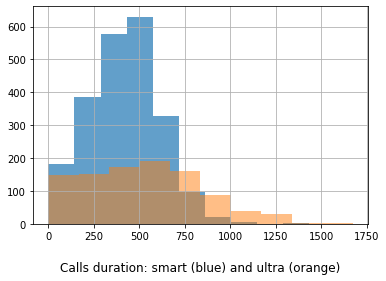

In [156]:
overall_trafic_smart['calls_duration'].hist(alpha=0.7).set_xlabel("Calls duration: smart (blue) and ultra (orange)", labelpad=20, size=12)
overall_trafic_ultra['calls_duration'].hist(alpha=0.5)

По гистограммам продолжительности звонков мы видим, что у пользователей тарифа ultra график скошен влево: часто они даже не используют бесплатный лимит, но им важно иметь возможность общения без ограничений. Гистограмма у тарифа smart скошена вправо: пользователям этого тарифа часто не хватает беслатного лимита. 

<AxesSubplot:xlabel='Gigabyte used: smart (blue) and ultra (orange)'>

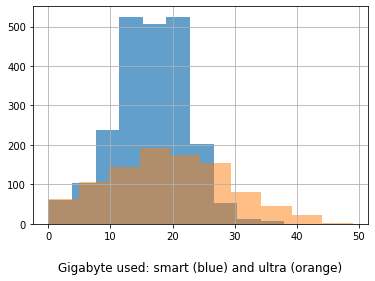

In [157]:
overall_trafic_smart['gb_used'].hist(alpha=0.7).set_xlabel("Gigabyte used: smart (blue) and ultra (orange)", labelpad=20, size=12)
overall_trafic_ultra['gb_used'].hist(alpha=0.5)

По гистограммам использования интернет трафика мы видим, у пользователей тарифа smart она более вытянута вдоль оси ординат и середина графика расположена на 15-17 гб, что немного выше бесплатно лимита. Большинство пользователей этого тарифа стараются либо уложиться в лимит, либо превысить его незначительно.

У пользователей ultra центр графика нормального распределения находится на уровне 20 гб и есть небольшая положительная скошенность (вправо), так у них ещё остаётся непотраченный бесплатный лимит. Граница скошенности как раз находится на 30 гб - ограничение лимита тарифа ultra. 

<AxesSubplot:xlabel='Sms: smart (blue) and ultra (orange)'>

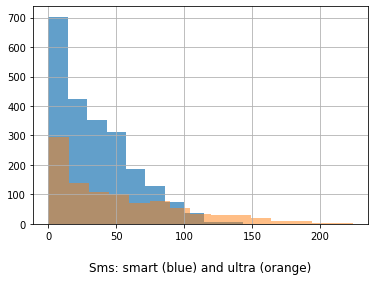

In [158]:
overall_trafic_smart['sms'].hist(alpha=0.7).set_xlabel("Sms: smart (blue) and ultra (orange)", labelpad=20, size=12)
overall_trafic_ultra['sms'].hist(bins=15, alpha=0.5)

Гистограммы отправленных смс пользователями тарифов ultra и smart представляют собой распределение Пуассона. При этом выделяется доля тех, кто мало использует sms. С развитием социальных сетей и мессенджеров значение этой функции уменьшается.

Почти всем пользователям тарифа ultra достаточно 200 смс в месяц, тарифа smart - 110 смс в месяц. Ограничение тарифа smart (бесплатный лимит - 50 смс) выделяется на гистограмме ступенью.

<AxesSubplot:xlabel='Payment - Ultra'>

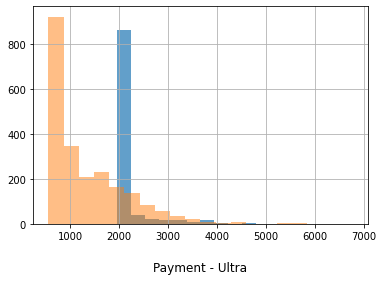

In [159]:
overall_trafic_ultra['payment'].hist(alpha=0.7).set_xlabel("Payment - Ultra", labelpad=20, size=12)
overall_trafic_smart['payment'].hist(bins=20, alpha=0.5)

Важный момент: стоит проверить суммарную выручку пользователей разных тарифов по месяцам.

In [193]:
tariff_sum_payment = overall_trafic_used.pivot_table(index='month', columns='tariff', values='payment', aggfunc='sum')
tariff_sum_payment['smart'] = tariff_sum_payment['smart']/1000
tariff_sum_payment['ultra'] = tariff_sum_payment['ultra']/1000 #переведём в тысячи для удобства 
print('        Суммарная выручка\nпользователей тарифов smart и ultra\n           по месяцам')
display(tariff_sum_payment)

        Суммарная выручка
пользователей тарифов smart и ultra
           по месяцам


tariff,smart,ultra
month,,
1,24.525,17.55
2,48.001,47.40
3,89.676,74.55
4,107.866,110.10
5,168.849,138.00
6,197.459,171.30
7,246.014,192.75
8,310.340,222.90
9,324.986,232.80


<AxesSubplot:xlabel='Total revenue by months depending on the tariff, ths rub', ylabel='Ths rub'>

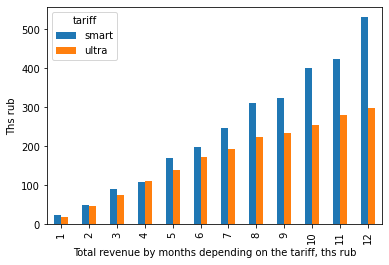

In [172]:
tariff_sum_payment.plot(y=['smart','ultra'], kind='bar', legend=True, xlabel='Total revenue by months depending on the tariff, ths rub', ylabel='Ths rub')

Пользователи тарифа ultra намного реже покупают дополнительные опции и всегда укладываются в бесплатный лимит по продолжительности звонков и смс (в среднем им необходимо 520 минут звонков и 40 смс). По этим показателям бесплатный лимит можно уменьшить вдвое (до 1500 минут и 500 смс) - очень маленькая вероятность, что кто то превысит этот лимит. В качестве дополнительных опций пользователи тарифа ультра покупают дополнительный интернет трафик.

Более половины пользователей тарифа smart покупают дополнительные опции - медианная стоимость оплаты услуг находится на уровне 1000 руб. 75% пользователей тратят менее 1750 руб. При этом существует значимая доля тех, кто тратит более 1950 руб. в месяц на оплату услуг связи (18,7%).

Суммарная выручка по месяцам показывает: несмотря на более низкую среднемесячную выручку с одного клиента тарифа smart, суммарная выручка с 500 случайных пользователей у этого тарифа больше, чем у тарифа ultra. При этом, разница этих тарифов в суммарной выручке к концу года составила почти два раза.

In [162]:
print('Доля месяцев у пользователей тарифа smart, когда они тратили более 1950 руб.:', len(overall_trafic_smart
          .loc[overall_trafic_smart['payment'] > 1950]['user_id'])
          /len(overall_trafic_smart)) #доля месяцев, когда пользователи тарифа smart таратили более 1950 руб. на оплату услуг связи.

Доля месяцев у пользователей тарифа smart, когда они тратили более 1950 руб.: 0.18707940780619112


## Проверка статистических гипотез

Гипотеза перед исследованием: средняя выручка пользователей тарифов Ультра и Смарт различается. Эта гипотеза двухстороняя, так как выручка может быть как выше у пользователей тарифов smart (много покупают дополнительных функций), так и ниже. Дисперсия у этих двух выборок отличается более чем в 4,5 раза - возможно это отличие будет и в генеральной совокупности, поэтому стоит применить аргумент equal_var=False. Выборки независимые, поэтому будем использовать st.ttest_ind. Нулевую гипотезу лучше формировать так, чтобы там был знак равно.

* Нулевая гипотеза: Выручка у пользователей тарифов smart и ultra равна.
* Альтернативная гипотеза: Выручка у пользователей тарифов smart и ultra различается.

In [163]:
smart = overall_trafic_smart['payment']
ultra = overall_trafic_ultra['payment']

alpha = 0.5

results = st.ttest_ind(
    smart, 
    ultra, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


В итоге получаем, что вероятность равенства выручки этих тарифов крайне низкая. Принимаем альтернативную гипотезу.

Для проверки гипотезы по городам нам необходимо добавить город каждого пользователя.

In [164]:
overall_trafic_used = overall_trafic_used.merge(users[['user_id','city']], on='user_id')

In [165]:
#display(overall_trafic_used.head(15)) #Проверка, как всё получилось. Всё хорошо.

In [166]:
moscow = overall_trafic_used.loc[overall_trafic_used['city'] == 'Москва', 'payment']
other_cities = overall_trafic_used.loc[overall_trafic_used['city'] != 'Москва', 'payment']
#print(other_cities.head(15)) #проверка
#print(len(moscow)) #Проверка количества строк с городом Москва - 611
#в выборке других городов соответственно: 3214 (суммарное кол-во строк по месяцам) - 611 = 2603 строк
print('Дисперсия для выборки Москвы:', np.var(moscow, ddof=1))
print('Дисперсия для выборки других городов:', np.var(other_cities, ddof=1))

Дисперсия для выборки Москвы: 565636.467011886
Дисперсия для выборки других городов: 654137.6285218114


Дисперсия выборок отличается на всего лишь на 20%, поэтому можно было бы оставить параметр equal_var=True по умолчанию, но в выборках разное количество строк (других городов в 4 раза больше). Выборки являются независимыми, поэтому будем также применять st.ttest_ind. Важный момент: если бы мы проводили исследование: *Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов и она больше, чем у пользователей других регионов*, то использовали бы односторонний тест (p-value/2). В этом задании нет такой необходимости, поэтому тест будет двухсторонний. 

Нулевая гипотеза:  Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
Альтернативная гипотеза:  Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [167]:
results = st.ttest_ind(
    moscow,
    other_cities, equal_var=False)

#У альфы оставляем то же значение

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Принимаем нулевую гипотезу: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Это означает, что существует очень высокая вероятность, что выручка случайного пользователя из Москвы будет мало чем отличаться от выручки пользователя из других регионов.

Для исследования была предоставлена выборка из общей генеральной совокупности пользователей компании "Мегалайн". Для анализа равенства выручки различных групп (определенный тариф, город) происходил отбор значений на основе предоставленной выборки. Так как исследовались независимые выборки (поведение одной группы пользователей не влияет на поведение другой группы), то использовался t-тест для двух независимых выборок (st.ttest_ind). Учитывалось 3 важных фактора:
- Генеральные совокупности не должны зависеть друг от друга.
- Выборочные средние должны быть нормально распределены (благодаря Центральной предельной теореме (ЦПТ), если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности).
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны. (Выборки в обоих случаях были разного размера и в первом случае ещё отличались дисперсии выборок - более чем в 4,5 раза. Поэтому для обоих случаев использовался аргумент equal_var = False).

## Общий вывод

Для анализа была предоставлена небольшая выборка клиентов из 500 пользователей компании «Мегалайн». Для каждого пользователя были доступны данные: кто они, откуда, каким тарифом пользуются (Ultra или smart), сколько звонков и сообщений каждый отправил в 2018 году. Датасеты по смс, звонкам и интернет трафику содержали в себе от 120 до 200 тыс. строк.

Цель исследования: проанализировать поведение клиентов и сделать вывод — какой тариф лучше (приносит больше денег) для корректировки рекламного бюджета.

В датасетах не было обнаружено пропусков за исключение столбца с датой окончания пользования тарифом в таблице с пользователями. Дубликаты в таблицах отсутствовали. Тип данных в столбцах с датой был заменён на datatime для удобства работы и убран лишний столбец с дополнительной индексацией в таблице internet.

Использованные минуты я округлил до верхнего значения по каждому отдельному звонку, чтобы их учесть при расчёте оплаты. Когда был получен расчёт за месяц использованных Мб, я перевёл их в гигабайты и тоже округлил до верхнего значения.

С помощью сводных таблиц в общую таблицу overall_traffic_used были добавлены:
   - количество сделанных звонков и израсходованных минут разговора по месяцам
   - количество отправленных сообщений по месяцам
   - объем израсходованного интернет-трафика по месяцам
   - тариф пользователя
   - помесячная выручка с каждого пользователя (на основе функции tariff_payment)

Далее было посчитано среднее количество минут разговора, сообщений и объёма интернет-трафика, которое требуется пользователям каждого тарифа в месяц. С помощью агрегирующих функций сводной таблицы посчитал дисперсию и стандартное отклонение (проверил, подходят ли полученые результаты для выборки). Построил гистограммы и описал получившиеся распределения.

Проверка гипотезы о средней выручке пользователей тарифов smart и ultra показала, что вероятность их равенства крайне мала. Гипотеза о равенстве средней выручке жителей Москвы и других регионов показала, что вероятность равенства средней выручки этих групп очень высока.

Так как исследовались независимые выборки,  то использовался t-тест для двух независимых выборок (st.ttest_ind). Учитывалось 3 важных фактора:
- Генеральные совокупности не должны зависеть друг от друга.
- Выборочные средние должны быть нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны. 

Выборки в обоих случаях были разного размера и в первом случае ещё отличались дисперсии выборок - более чем в 4,5 раза. Поэтому для обоих случаев использовался аргумент equal_var = False.

**Общие выводы:**

* Пользователи тарифа ultra намного реже покупают дополнительные опции и всегда укладываются в бесплатный лимит по продолжительности звонков и смс (в среднем им необходимо 520 минут звонков и 40 смс). По этим показателям бесплатный лимит можно уменьшить вдвое (до 1500 минут и 500 смс) - очень маленькая вероятность, что кто то превысит этот лимит. 
* В качестве дополнительных опций пользователи тарифа ultra покупают только дополнительный интернет трафик. В среднем, они тратят 19 гб в месяц.
* Более половины пользователей тарифа smart покупают дополнительные опции - медианная стоимость оплаты услуг находится на уровне 1000 руб. 75% пользователей тратят менее 1750 руб. При этом существует значимая доля тех, кто тратит более 1950 руб. в месяц на оплату услуг связи (18,7%). 
* В среднем пользователи тарифа smart тратят 420 минут, 28 смс и 17 гб интернет трафика.
* Вероятность равенства выручки пользователей тарифов smart и ultra крайне мала.
* Вероятность равенства выручки пользователей из Москвы и из других регионов достаточно высока.


* В среднем, пользователь тарифа ultra приносит в месяц выручки больше, чем пользователь тарифа smart (1950 руб. против 1000 руб.). При этом, выручка по тарифам по месяцам показывает, что из 500 случайных пользователей абоненты тарифа smart тратят суммарно больше, чем абоненты тарифа ultra (За счёт того, что пользователей тарифа smart больше, чем пользователей тарифа ultra). Поэтому, учитывая данный факт, стоит увеличить рекламный бюджет тарифа smart, если планируется достигать роста выручки за счёт увеличения количества абонентов. 
* Если же планируется увеличить среднемесячную выручку с одного абонента, то стоит увеличивать рекламный бюджет тарифа ultra. 

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения (в этом задании их заполнять не стоит)
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  посчитано и добавлено в таблицу: количество отправленных сообщений по месяцам
- [x]  посчитано и добавлено в таблицу: объем израсходованного интернет-трафика по месяцам
- [x]  посчитано и добавлено в таблицу: помесячную выручку с каждого пользователя
- [x]  изучены следующие параметры:  сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Посчитайте среднее количество, дисперсию и стандартное отклонение для каждого параметра»
- [x]  выполнено задание: «Опишите расспределения».
- [x]  выполнено задание: «Проверка гипотезы: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются». 
- [x]  выполнено задание: «Проверка гипотезы: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.».
- [x]  выполнено задание: «Описать как вы формулировали нулевую и альтернативную гипотезы».
- [x]  выполнено задание: «Описать какой критерий использовали для проверки гипотез и почему»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод